<a href="https://colab.research.google.com/github/pallavi-2000/pallavi2000/blob/main/22006314.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project: Analysis of GW190521

For this assignment, you will have to conduct an analysis of the gravitational-wave signal GW190521. This analysis should be done within a Jupyter notebook, with many comments in [Markdown](https://colab.research.google.com/notebooks/markdown_guide.ipynb) desribing and **justifying** the steps taken.

- The writing should be at the level of a fellow student of the class
- Submit **both** the .ipybn file and the converted .pdf file:
  - submit the .pdf file to TurnitIn (make sure all the cells have been run).
  - and the .ipynb file by e-mail with the subject "PXT903/PX4236 Final Project"
- Describe **in details** every step of your analysis throughout the notebook.
- Any setting choice (sampling rate, window parameter, FFT length, etc...) needs to be justified, either by its own investigation or relevant citations from the literature.
- Code alone, without a detailed descriptions of what is done and why, is worth half marks at the most.

NOTE: you can use any of the notebooks covered in the class, or code available online, _provided that you justify the settings and methods used_.

## Introduction (15 points)
Minimum 300 words.
- Write an introduction to this analysis, citing the relevant context and literature.
- Write a short summary of what is done in the notebook.


The GW190521 signal was detected on May 21st, 2019 at 03:02:29 UTC by Advanced LIGO and Advanced Virgo, the duration of the signal was short. 

* The signal was detected by all of three detectors with a signal-to-noise ratio of 14.7.
* The estimated false-alarm rate was 1 in 4900 years using a search that is sensitive to generic transients. 
* If GW190521 originated from a quasicircular binary inspiral, then the detected signal is consistent with the merging of two black holes with masses of $85^{+21}_{-14}$ M⊙ and $66^{+17}_{-18}$ M⊙ (90% credible intervals). 
* It is inferred that the primary black hole mass is within the gap produced by (pulsational) pair-instability supernova processes, with only a 0.32% probability of being below 65 M⊙. 
* The mass of the remnant is calculated to be $142^{+28}_{-16}$ M⊙, indicating an intermediate mass black hole (IMBH). 
* The source's luminosity distance is $5.3^{+2.4}_{-2.6}$ Gpc, which corresponds to a redshift of $0.82^{+0.28}_{-0.34}$. 
* The rate of mergers similar to GW190521 is inferred to be $0.13^{+0.30}_{-0.11}$ $Gpc^{−3} yr^{−1}$

The signal, resembling about four short wiggles, is extremely brief in duration, lasting about 0.1 seconds and consisting of four cycles within the frequency range of 30-80 Hz. From what the researchers can tell, GW190521 was generated by a source that is roughly 5 gigaparsecs away, when the universe was about half its age, making it one of the most distant gravitational-wave sources detected so far.[1]

The event is the first ever detection of **intermediate-mass black hole (IMBH)**—a class of black holes with masses in between about one hundred and tens of thousands of solar masses. This event is exceptional because the size of the larger progenitor falls in a "gap" where black holes are not expected to form by conventional mechanisms, and it is the first direct observation of an IMBH. Black holes with a certain mass can only exist if there is an astrophysical process for creating them, and the collapse of massive stars provides one key pathway to black hole formation that sets some constraints on expected black hole masses. Stellar-mass black holes can have a wide range of masses, but only up to a maximum value set by pair instability. Pair instability creates a mass gap between ∼65 and ∼135 solar masses, where black holes aren't theoretically expected. Until now, none of the progenitor black holes detected by LIGO and Virgo lay within this gap. This discovery might have important implications for our understanding of astrophysical black hole formation. The two probable scenarios that could lead to a black hole binary like the one detected are the collapse of two stars in a binary system or the merger of two smaller black holes. The spins of the merging black holes could help in distinguishing the two scenarios, since they are expected to be roughly aligned in the case of an isolated binary evolution and to be randomly oriented in a dynamical interaction scenario. The researchers' analysis shows that the spins of GW190521's merging black holes are likely misaligned. This result mildly favors the second scenario, but the evidence isn't conclusive.[6]

The signal's peak frequency is at 60 Hz, which suggests that the source of the signal is likely a compact binary merger. Additionally, the high frequency peak implies that the objects involved in the merger were very massive.[1]

The notebook consist of data analysis of GW190521:

* The necessary libraries like pycbc, gwpy are installed.

* Data Acquisition: The data can be extarcted from LIGO and VIRGO detectors, we generate relevenat plots such as GPS time vs strain, compute the Power Spectral Density, and whitening of data.( the data is then bandpaseed in the frequency range of 30 to 80 Hz as in the detection paper we can see that rest of the signal is noise.)

* Generation of CBC model: A template is created of the signal using data for the parameters from a paper the approximant we use is *SEOBNRv4_opt*. 

* Burst model: A burst model is generated by a bye-eye-estimate, and the template and the burst model are compared.

* Signal to Noise ratio: The SNR for our signal is calculated which is calculated to be around 6.3 and almost comes to 7. 

* Statistical Analysis: Bayesian statistics are used to determine the probability that the signal is real and to estimate the properties of the source, such as its mass and distance.

* The notebook also has code from bibly, it provides tools for the analysis of gravitational-wave data, including Bayesian parameter estimation, hypothesis testing, and model selection. Bilby can be used with data from various gravitational-wave detectors, such as LIGO and Virgo, and it allows for the use of custom waveform models.

## The data and noise model (10 points)

- Download and plot the relevant gravitational-wave data for GW190521.
- Compute and plot the Power Spectrum Density.
- Compute and plot the whitened data. Use filters if necessary to best highlight where the signal is (or might be).

In the beginning we will install all the **required libraries** and the **pycbc package** which is a software package used to explore astrophysical sources of gravitational waves. We will also make use of **gwpy package** a that is a collaboration-driven Python package providing tools for studying data from ground-based gravitational-wave detectors. This is the main software used to interface to the common time-domain and frequency-domain data produced by the LIGO and Virgo instruments and their analysis.

In [1]:
from matplotlib import pyplot as plt
import numpy as np

! pip install -q lalsuite pycbc

In [2]:
import pycbc
pycbc.__version__

'2.2.0'

In [3]:
! pip install -q gwpy

The **gwosc package** is installed via the gwpy,** gwosc.datasets** provides tools for searching for datasets: full run strain data releases, gravitational-wave events, and catalogues of events.

**gwosc.datasets.event_gps**, we can query for the GPS time of a specific event: for instance in this notebook we are performing data analysis of GW190521 and the query returns a value **1242442967.4**.

The result is obtained in the GPS time system, which counts the number of seconds that have elapsed since the start of the GPS epoch at midnight (00:00) on January 6th 1980. GWOSC provides a GPS time converter you can use to translate into datetime, or you can use **gwpy.time**.

The event GW190521 was observed on **2019-05-21 03:02:29.400000**



In [4]:
from gwosc.datasets import event_gps
gps = event_gps('GW190521')
print(gps)

1242442967.4


In [5]:
from gwpy.time import to_gps
from gwpy.time import from_gps
print(from_gps(gps))

2019-05-21 03:02:29.400000


Now we can build a [start, end) GPS segment of 32 seconds around this time for performing our analysis.
We choose a small segment for our convenience.

In [6]:
segment = (int(gps)-16, int(gps)+16)
print(segment)

(1242442951, 1242442983)


We will read the open data for **GW190521, the heaviest BBH (binary black hole system)** detected with gravitational-waves.
We can use the **TimeSeries.fetch_open_data** method to download data directly from https://www.gw-openscience.org, using the GPS time obtained earlier.

We will get data from **LIGO-Livingston, LIGO-Hanford and Virgo** using the identifiers 'L1','H1' and 'V1'. 


*   'H1' - LIGO-Hanford
*   'L1' - LIGO-Livingston
*   'V1' - (Advanced) Virgo

The three detectors were live during this event.



In [7]:
from gwpy.timeseries import TimeSeries
ldata = TimeSeries.fetch_open_data('L1', *segment)
hdata = TimeSeries.fetch_open_data('H1', *segment)
vdata = TimeSeries.fetch_open_data('V1', *segment)

Based on the GPS time and strain graph, it can be observed that the overall amplitude is greater than necessary, measuring at $O(10^{-19})$, whereas the typical amplitude of astrophysical signals is $O(10^{-21})".

The LIGO gravitational wave detector, a Michelson interferometer, was specifically designed to detect space-time strain at a level of $10^{-21}$. The deformation of space-time caused by a gravitational wave generated from a source in our galaxy is expected to be no more than $10^{-21}$ in strain on the earth's surface. Even with a kilometer-long interferometer arm, the corresponding length change due to a gravitational wave would be on the order of $10^{-18}$, which is two powers of ten smaller than the typical size of an atom, $10^{-10}$ m. [2]

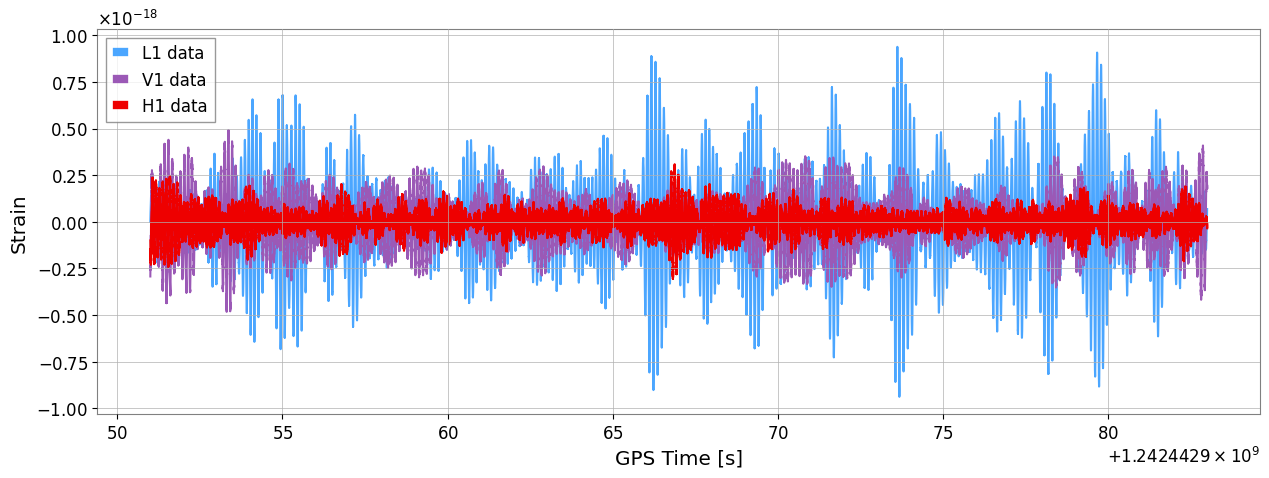

In [8]:
plt.figure(figsize=(15,5))
plt.plot(ldata.times,ldata,label='L1 data',color='gwpy:ligo-livingston')
plt.plot(vdata.times,vdata,label='V1 data',color='gwpy:virgo')
plt.plot(hdata.times,hdata,label='H1 data',color='gwpy:ligo-hanford')
plt.xlabel('GPS Time [s]')
plt.ylabel('Strain')
plt.legend();

The strain data obtained contains many sources of noise:
 
* Seismic vibrations

* Thermal noise
* Suspension
* Mirror coating
* Quantum noise
* Shot noise
* Radiation pressure
 
The noise is particularly large at low frequencies and at high frequencies. Let's compute the Amplitude Spectral Density (ASD) of the data. The power contained in a wave is proportional to the square of the amplitude of the wave, so you can get an ASD graph by taking the square root of the PSD's vertical axis.

In [9]:
from scipy.signal import get_window

Windowing is a technique used in signal processing to reduce the impact of spectral leakage, which occurs when a signal is analyzed using the Fourier transform. When a signal contains a frequency component that is not an exact multiple of the frequency resolution of the Fourier transform, the energy from that frequency component "leaks" into adjacent frequency bins, causing distortion in the resulting frequency spectrum.

Windowing reduces spectral leakage by applying a mathematical function, called a window, to the data before performing the Fourier transform. The windowing function modifies the time-domain signal so that it gradually transitions to zero at the edges, reducing the effect of spectral leakage in the Fourier transform.

In the code snippet provided, the get_window function is used to define a window function with a specific shape (a Tukey window with a parameter of 1/4). This window function is then applied to the data before computing the amplitude spectral density (ASD) using the asd function. The scaling_factor variable is then calculated based on the mean value of the window function, which is used to normalize the resulting ASD.

In summary, the windowing function is used in this code to reduce the impact of spectral leakage and improve the accuracy of the spectral analysis of the data.

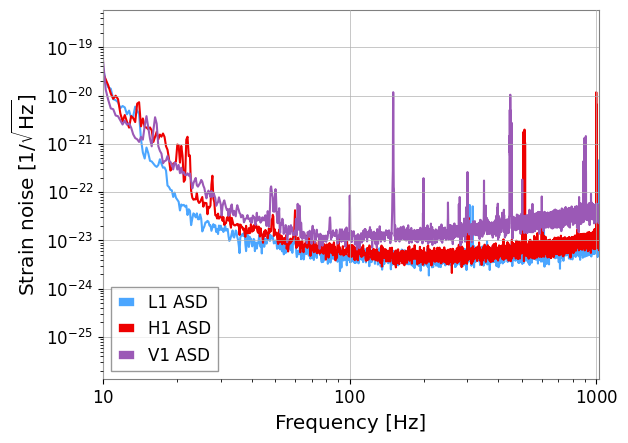

In [10]:
window=get_window(('tukey',1./4.),hdata.size)
scaling_factor=np.abs(window).mean()

lasd=ldata.asd(fftlength=4)
hasd=hdata.asd(fftlength=4)
vasd=vdata.asd(fftlength=4)

plt.loglog(lasd.frequencies,lasd,label='L1 ASD',color='gwpy:ligo-livingston')
plt.loglog(hasd.frequencies,hasd,label='H1 ASD',color='gwpy:ligo-hanford')
plt.loglog(vasd.frequencies,vasd,label='V1 ASD',color='gwpy:virgo')

plt.xlabel('Frequency [Hz]')
plt.ylabel('Strain noise [$1/\sqrt{\mathrm{Hz}}$]')
plt.xlim(10,1024)
plt.legend();

<Figure size 800x800 with 0 Axes>

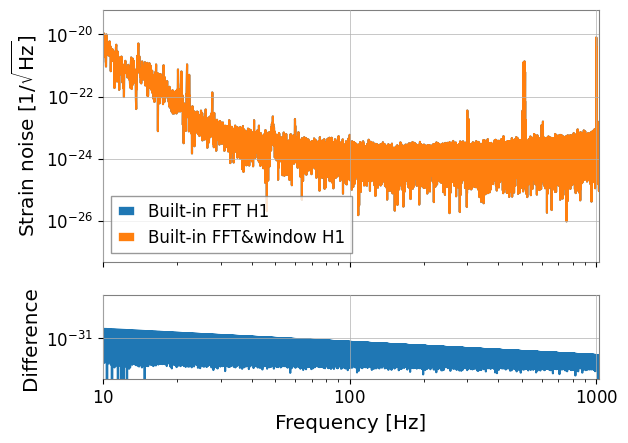

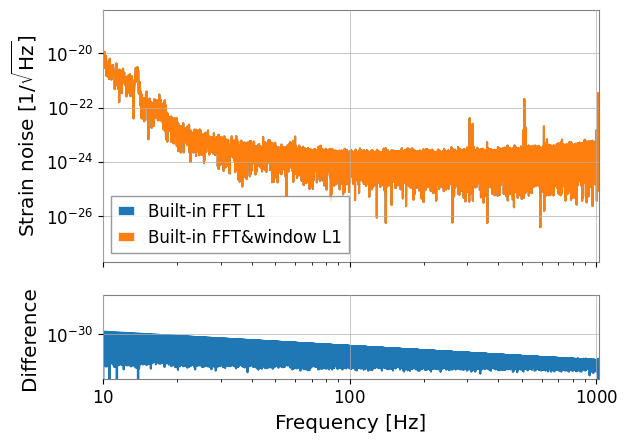

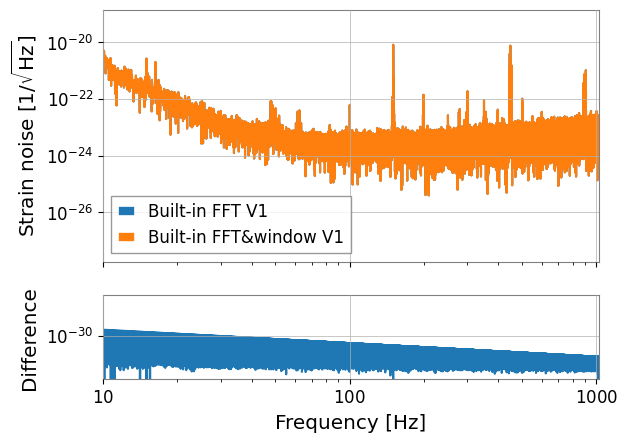

In [11]:
window=get_window(('tukey',1./4.),hdata.size)
scaling_factor=np.abs(window).mean()

strain_H1_fft=(hdata*window).fft()/scaling_factor
strain_H1_afft=hdata.average_fft(window=('tukey',1./4.)) # built-in function which already includes the normalisation

strain_L1_fft=(ldata*window).fft()/scaling_factor
strain_L1_afft=ldata.average_fft(window=('tukey',1./4.))

strain_V1_fft=(vdata*window).fft()/scaling_factor
strain_V1_afft=vdata.average_fft(window=('tukey',1./4.))

plt.figure(figsize=(8, 8))

f, (a0, a1) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]})
f1, (b0, b1) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]})
f2, (c0, c1) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]})

a0.loglog(strain_H1_fft.frequencies,np.abs(strain_H1_fft),label='Built-in FFT H1')
a0.loglog(strain_H1_afft.frequencies,np.abs(strain_H1_afft),label='Built-in FFT&window H1')
a0.set_ylabel('Strain noise [$1/\sqrt{\mathrm{Hz}}$]')
a0.legend(loc='lower left')

b0.loglog(strain_L1_fft.frequencies,np.abs(strain_L1_fft),label='Built-in FFT L1')
b0.loglog(strain_L1_afft.frequencies,np.abs(strain_L1_afft),label='Built-in FFT&window L1')
b0.set_ylabel('Strain noise [$1/\sqrt{\mathrm{Hz}}$]')
b0.legend(loc='lower left')

c0.loglog(strain_V1_fft.frequencies,np.abs(strain_V1_fft),label='Built-in FFT V1')
c0.loglog(strain_V1_afft.frequencies,np.abs(strain_V1_afft),label='Built-in FFT&window V1')
c0.set_ylabel('Strain noise [$1/\sqrt{\mathrm{Hz}}$]')
c0.legend(loc='lower left')

a1.loglog(strain_H1_fft.frequencies,np.abs(strain_H1_fft-strain_H1_afft))
a1.set_ylabel('Difference')

b1.loglog(strain_L1_fft.frequencies,np.abs(strain_L1_fft-strain_L1_afft))
b1.set_ylabel('Difference')

c1.loglog(strain_H1_fft.frequencies,np.abs(strain_V1_fft-strain_V1_afft))
c1.set_ylabel('Difference')

a1.set_xlabel('Frequency [Hz]')
a1.set_xlim(10,1024);
b1.set_xlabel('Frequency [Hz]')
b1.set_xlim(10,1024);
c1.set_xlabel('Frequency [Hz]')
c1.set_xlim(10,1024);

We are using the amplitude spectral density it as a measure of how much noise there is at each frequency. From this plot, we may want to remove all data below 30Hz, as the noise is high below about 30Hz. In addition, as we know we are looking for the GW190521 signal, we can narrow down the frequency range further: from the discovery paper, that signal ends at about 80Hz. So we can safely remove the data above 100Hz. [1]
To remove the data at those frequencies (<30Hz and >100z), we will use a bandpass filter. We can also zoom in around the time of the event:

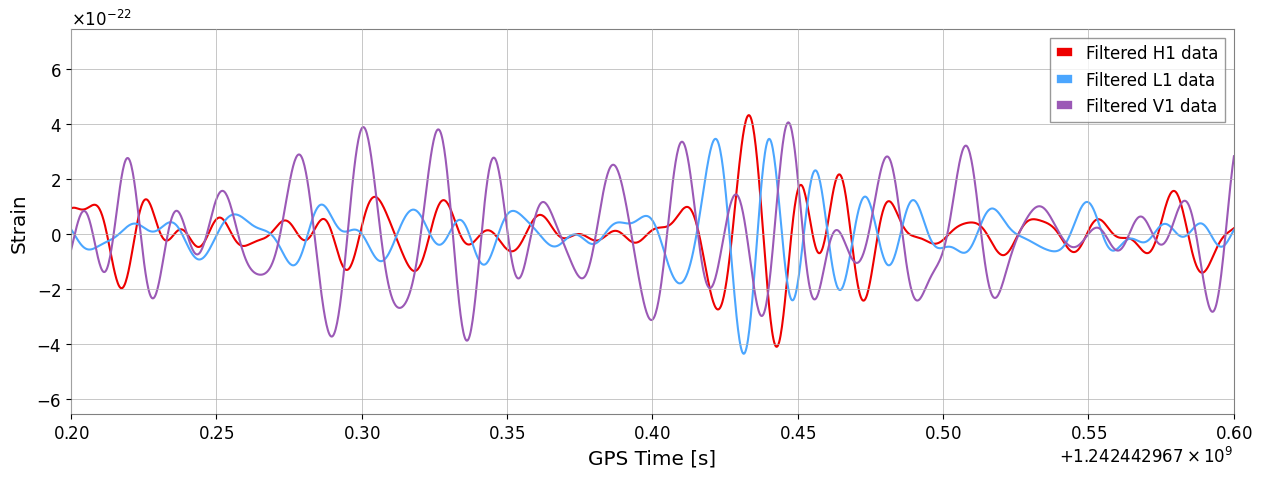

In [12]:
# bandpass the data, and only keep 4 seconds around the event's time:
hdata_bp=hdata.bandpass(30,80).crop(gps-2,gps+2)
ldata_bp=ldata.bandpass(30,80).crop(gps-2,gps+2)
vdata_bp=vdata.bandpass(30,80).crop(gps-2,gps+2)

plt.figure(figsize=(15,5))
plt.plot(hdata_bp.times,hdata_bp,label='Filtered H1 data', color='gwpy:ligo-hanford')
plt.plot(ldata_bp.times,ldata_bp,label='Filtered L1 data', color='gwpy:ligo-livingston')
plt.plot(vdata_bp.times,vdata_bp,label='Filtered V1 data', color='gwpy:virgo')
plt.xlabel('GPS Time [s]')
plt.ylabel('Strain')
plt.xlim(gps-0.2,gps+0.2)
#plt.ylim(-5e-22, 5e-22)
plt.legend();

In [13]:
from pycbc.waveform import get_td_waveform

In this notebook we have used a Fast Fourier Transform or FFT. We alredy have built in libraries to calculate discrete Fourier transform of $x(t_{j})$, and return the amplitude of each of the frequencies in the series.
These libraries typically use the complex notation to return the Fourier coefficients.

Given an array of N data points $x(t_{j})$, an FFT function will return N amplitudes $A_{k}$, one for each of the frequency components in the series. Using the complex notation:

$A_{k} = \sum_{j = 0}^{N-1}x(t_{j})e^{−2πif_{k}t_{j}} = NC_{k} =\frac{1}{2}
N (α_{k} − iβ_{k})$



In this section we calculate the power spectra density (PSD) of a gravitational wave signal provides information about the frequency content and amplitude distribution of the gravitational wave signal.

A gravitational wave signal can be decomposed into a sum of sine and cosine waves with different frequencies and amplitudes. The PSD gives the distribution of the power of these waves as a function of frequency. 

The power spectrum of the time series has
power at all frequencies, to filter out unwanted frequencies we use the window, in our code we have used Welch window which effectively reduces noise in the estimated power spectra in exchange for reducing the frequency resolution. Due to the noise caused by imperfect and finite data.

 $w_{j} = 1 − (\frac{j − \frac{N}{2}}{\frac{N}{2}})^2$



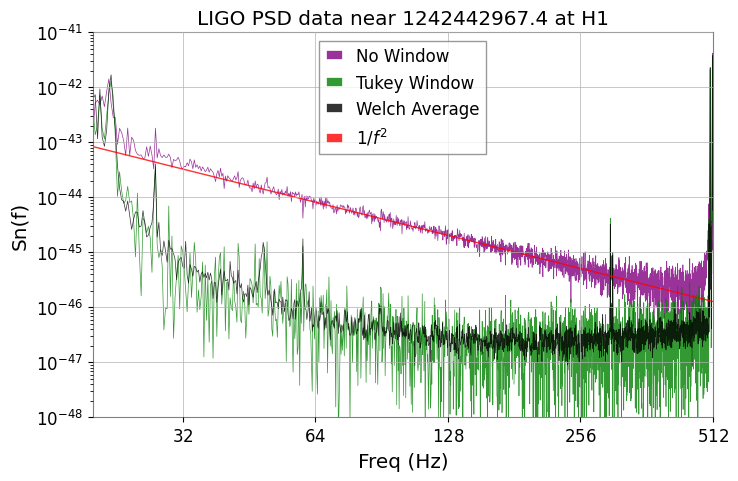

In [14]:
Pxx_H1=hdata.psd(fftlength=4.,window=('tukey',1./4.),method='welch',overlap=2.)
Pxx_L1=hdata.psd(fftlength=4.,window=('tukey',1./4.),method='welch',overlap=2.)

# A shorter section of the data, of the same lenght of the individual elements we are averaging over above:
hdata_4s=hdata.crop(gps - 2,gps + 2)

tukey_Pxx_H1=hdata_4s.psd(fftlength=4.,window=('tukey',1./4.))
nowin_Pxx_H1=hdata_4s.psd(fftlength=4.,window='boxcar')

plt.figure(figsize=(8, 5))
# scale x and y axes
plt.xscale('log', base=2)
plt.yscale('log', base=10)

# plot nowindow, tukey, welch together 
plt.plot(nowin_Pxx_H1.frequencies, nowin_Pxx_H1,'purple',label= 'No Window',
         alpha=.8, linewidth=.5)
plt.plot(tukey_Pxx_H1.frequencies, tukey_Pxx_H1 ,'green',label='Tukey Window',
         alpha=.8, linewidth=.5)
plt.plot(Pxx_H1.frequencies, Pxx_H1,'black',label='Welch Average', alpha=.8,
         linewidth=.5)

# plot 1/f^2
# give it the right starting scale to fit with the rest of the plots
scale=nowin_Pxx_H1.value_at(32)*(32**2)
plt.plot(nowin_Pxx_H1.frequencies[1:], scale/nowin_Pxx_H1.frequencies[1:]**2,'red',
         label= r'$1 / f^2$', alpha=.8, linewidth=1)


plt.axis([20, 512, 1e-48, 1e-41])
plt.ylabel('Sn(f)')
plt.xlabel('Freq (Hz)')
plt.legend(loc='upper center')
plt.title('LIGO PSD data near ' + str(gps) + ' at H1')
plt.show()


Data Whitening : This involves filtering the data to remove low-frequency noise and then dividing the remaining data by the detector's noise power spectrum, effectively "whitening" the data. This technique equalizes the noise across all frequencies, making it easier to identify weak signals that would otherwise be buried in noise.

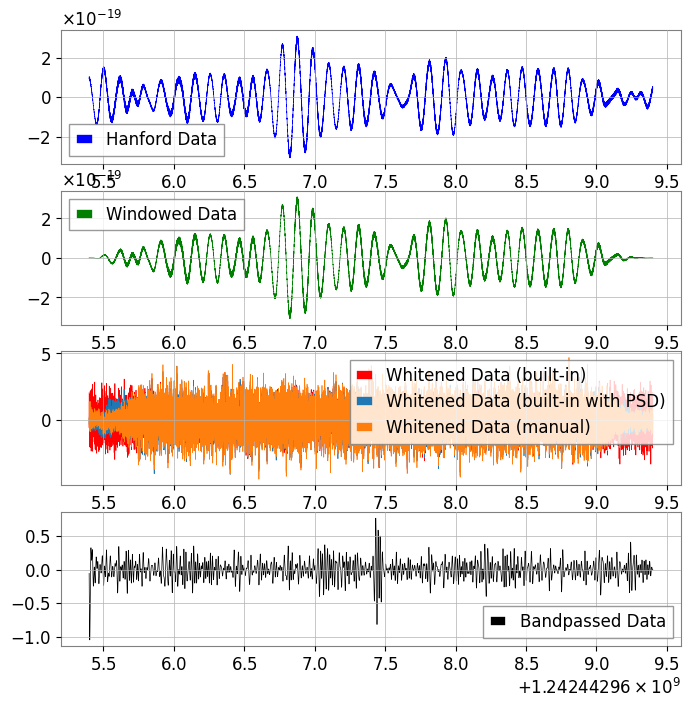

In [15]:
# plot original strain data
plt.figure(figsize=(8, 8))
plt.subplot(4, 1, 1)

plt.plot(hdata_4s.times, hdata_4s, 'blue', 
         label='Hanford Data', linewidth=.5)
plt.legend()

# plot windowed data
plt.subplot(4, 1, 2)
strain_H1_4s_win=hdata_4s*get_window(('tukey',1./4.),hdata_4s.size)
plt.plot(strain_H1_4s_win.times, strain_H1_4s_win, 'green', 
         label='Windowed Data', linewidth=.5)
plt.legend()

# plot whitened data
plt.subplot(4, 1, 3)

# First, using the built-in "whiten" function, using it to compute the PSD on
# the whole data (identically to the calculations in the previous section)
# and only keeping the 4 seconds of interest.
strain_H1_white = hdata.whiten(fftlength=4,overlap=2,window=('tukey',1./4.))
strain_white=strain_H1_white.crop(gps - 2,gps + 2)

# We can also use the "whiten" function directly on the 4-second long data segment,
strain_white_v2 = strain_H1_4s_win.whiten(asd=np.sqrt(Pxx_H1),window=('tukey',1./4.))

# Finally, we can also do it all manually, dividing by the ASD=PSD**0.5, and taking care
# of the normalisation.
strain_white_v3 =(hdata_4s.average_fft(window=('tukey',1./4.))/(Pxx_H1**(1/2))).ifft()*(1./np.sqrt(1./(hdata_4s.dt*2)))

plt.plot(strain_white.times, strain_white, 'red', 
         label='Whitened Data (built-in)', linewidth=.5)
plt.plot(strain_white_v2.times, strain_white_v2, 
         label='Whitened Data (built-in with PSD)', linewidth=.5)
plt.plot(strain_white_v3.times, strain_white_v3, 
         label='Whitened Data (manual)', linewidth=.5)
plt.legend()

# plot bandpassed data
plt.subplot(4, 1, 4)
strain_bp = strain_white.bandpass(30.,80.)
plt.plot(strain_bp.times, strain_bp, 'black', 
         label='Bandpassed Data', linewidth=.5)

plt.legend()
#plt.yticks([-6, -3, 0, 3, 6, 9])
#plt.tight_layout()
#plt.xlim([-2, 2])
#plt.ylim([-8, 8])
plt.show()

Matched Filtering:

The bandpassed data plot for Handord.

Text(0.5, 0, 'time [s]')

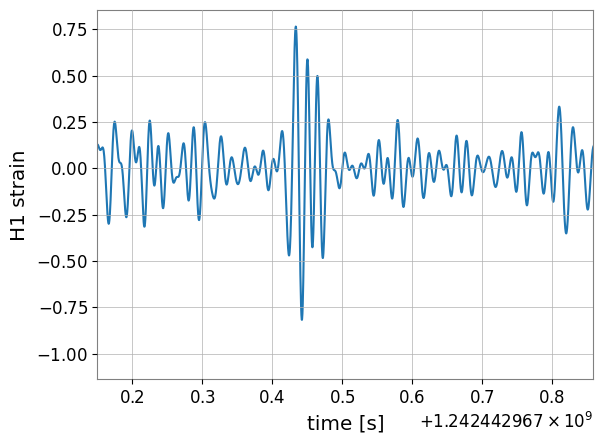

In [16]:
plt.plot(strain_bp)
plt.xlim(gps-0.25,gps+0.46)
plt.ylabel('H1 strain')
plt.xlabel('time [s]')

## The signal model (10 points)

- Generate and plot a CBC signal which you expect to be a good match for the signal. Use the literature, and cite your sources
- Generate and plot a phenomenological model (sometimes refer to as a "Burst" model). A model whose parameters describe the shape of the waveform itself, not the source. 
- Compute the overlap between those those two signals, and try to find parameters that maximises that overlap.

NOTE: remember that gravitational-wave are redshifted.

The data used for this code is taken from the discovery paper[1] and another resource.[7]

The values used are obtained from a paper that used the SEOBNRE approximant:

Primary mass, m_1 $[{M}_{\odot }]$	${92}_{-16}^{+26}$		
Secondary mass, m_2 $[{M}_{\odot }]$	${69}_{-19}^{+18}$	
Luminosity distance, d_L [Gpc]	${4.1}_{-1.8}^{+1.8}$	
Right ascension, alpha [rad]	${3.6}_{-3.5}^{+2.7}$	
decl.,delta [rad]	$-{0.7}_{-0.5}^{+1.4}$	$-{0.7}_{-0.4}^{+1.5}$

Reference phase, phi [rad]	${3.1}_{-2.7}^{+2.9}$	
Polarization, psi [rad]	${1.5}_{-1.4}^{+1.5}$	
Inclination, ${\theta }_{\mathrm{JN}}$ [rad]	${1.3}_{-1.0}^{+1.6}$		
Log Bayes factor against SEOBNRE, $\mathrm{ln}\,{{ \mathcal B }}_{X/E}$	0.0	

In the paper it was given that the log Bayes factor of each analysis against the signal-to-noise log Bayes factor obtained for ${e}_{10}\geqslant 0.1$ using SEOBNRE ($\mathrm{ln}\,{{ \mathcal B }}_{{\rm{S}}/{\rm{N}}}=85.7$).[7]

We know the gps time of the event, and can use that to generate the CBC signal template. We then remove frequencies below 30, as the discovery paper suggests that we obtain a signal in the range 30-80 Hz, also from the asd we can see that rest of data is noise.

In [17]:
from gwpy.timeseries import TimeSeries

In [18]:
time_center = 1242442967.4

data={} # an empty dictionary
ifos=['L1','H1'] # a list which we use as the dictionary keys
for ifo in ['H1','L1']:
    data[ifo] = TimeSeries.fetch_open_data(ifo, time_center - 8, time_center + 8)

In [19]:
psd={}
for ifo in ifos:
    psd[ifo] = data[ifo].psd(fftlength=4,window=('tukey',1./4.),method='welch',overlap=2.)

In [21]:
colours=['gwpy:ligo-livingston','gwpy:ligo-hanford']

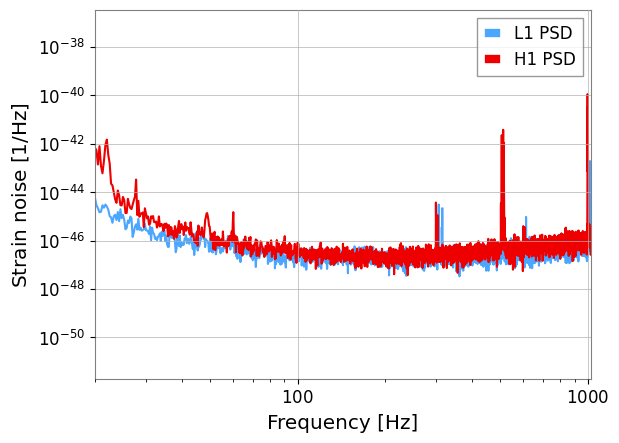

In [22]:
for ifo,colour in zip(ifos,colours):
    plt.loglog(psd[ifo],label='{} PSD'.format(ifo),color=colour)

plt.xlabel('Frequency [Hz]')
plt.ylabel('Strain noise [$1/\mathrm{Hz}$]')
plt.xlim(20,1024)
plt.legend();

We're going to assume that our noise is exactly described by the PSD estimated above.  In other words, we're employing a 0-parameter noise model.

For production analyses we make use of the [BayesLine](https://arxiv.org/abs/1410.3852) algorithm, which employs a parametric model for the PSD itself and allows us to work with only on-source data.

## Signal model

Here we are using the `SEOBNRv4` approximant, which describes the inspiral, merger, and ringdown phases of a binary black hole merger using a combination of analytical approximations and fits to numerical relativity simulations.

In [23]:
from pycbc.waveform import get_td_waveform

With two detectors we are potentially sensitive to more than a single polarization of gravitational waves.  We also have to account for the delay in the time of arrival of the signal based on where in the sky the source may be located.  This expands our parameters to be component mass (assuming an equal mass binary), right ascension, declination, luminosity distance, inclination, merger time, merger phase, and polarization angle.

For a give set of parameters $\vec{\lambda}$ we'll now have to generate the plus and cross polarizations of the GW emission (taking into account the inclination of the binary, and scaling to the proper distance), then combine these with each detector's antenna pattern (which depend on the location of the binary relative to the detector's orientation) to determine the detector response.  Finally, we have to shift the time of arrival of the signal to be consistent with the delay time expected based on the RA and dec of the binary.

We are generating the geocenter waveform then projecting it across the network.

In [24]:
from pycbc.detector import Detector

In [25]:
# Creating the detector objects:
det={}
for ifo in ifos:
    det[ifo]=Detector(ifo)

In [26]:
declination = -0.7
right_ascension = 3.6
polarization = 1.5

fp={}
fc={}
for ifo in ifos:
    fp[ifo], fc[ifo] = det[ifo].antenna_pattern(right_ascension, declination, polarization, time_center)
    print("{}: fp={}, fc={}".format(ifo,fp[ifo], fc[ifo]))

L1: fp=-0.4917071608740113, fc=0.21748593304905334
H1: fp=0.3501627046766844, fc=-0.34836316563781733


For visualization it is still useful to look at the whitened data, where the data have been filtered to produce a flat PSD. We also remove the frequencies below 20Hz and above 80Hz:

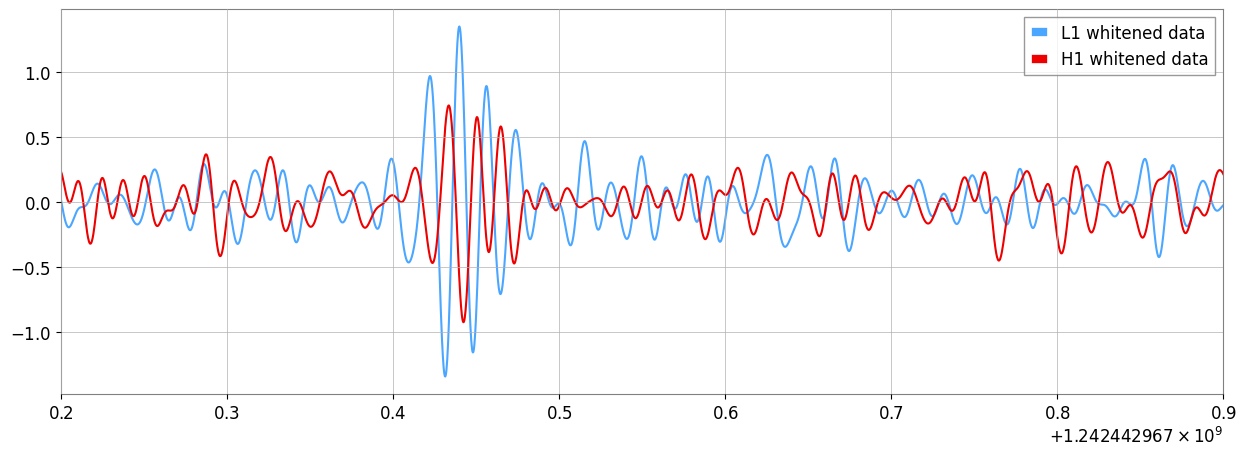

In [27]:
plt.figure(figsize=(15,5))

white_data={}
for ifo,colour in zip(ifos,colours):
    white_data[ifo]=data[ifo].whiten(fftlength=4).bandpass(20,80)
    plt.plot(white_data[ifo],label='{} whitened data'.format(ifo),color=colour)
plt.xlim(time_center-0.2, time_center+.5)
plt.legend();

As the L1 detector is anti-aligned to the H1 detector (by construction). So it is possible to compare both strain data by multiplying one of them by -1. In addition, a time-delay needs to be taken into account to have both whitened data match well. We taken some values from a scientific paper for right ascesion and declination to detemine the time delay.[7] 

We also need to compute the time-delay between our refence time-at-geocenter and the time at which the gravitational-wave signal will hit the detectors:

In [28]:
time_delay=det['H1'].time_delay_from_earth_center(right_ascension, declination, time_center)

print("For the sky-position ra={},dec={}, at time={},".format(right_ascension,declination,time_center))
print("the time delay between Hanford and geocenter is {} seconds".format(time_delay))

For the sky-position ra=3.6,dec=-0.7, at time=1242442967.4,
the time delay between Hanford and geocenter is 0.001483548502421943 seconds


Here we are making a light-weight wrapper for `get_td_waveform()` that will take parameter vector $\vec{\lambda}$ and generate a waveform with the same sampling rate and time window as our data. We are projectong the "plus" and "cross" polarisations onto the detector arms.

In [29]:
for ifo in ifos:
    data[ifo]=data[ifo].crop(time_center-2,time_center+2)

In [30]:
def gen_template(param,
                 delta_t=data['H1'].dt.value, # Assuming all IFOs have the same dt !
                 duration=data['H1'].duration.value, # Assuming all IFOs have the same duration !
                 start_time=data['H1'].x0.value,# Assuming all IFOs have the same start time !
                 f_lower=20.):
    
    m1, m2, distance, time, phase, right_ascension, declination, inclination, polarization = param

    hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                             mass1=m1,
                             mass2=m2,
                             distance=distance,
                             inclination=inclination,
                             delta_t=delta_t,
                             f_lower=f_lower) 
    
    # Resize the signal buffer
    hp.resize(int(duration/delta_t))
    hc.resize(int(duration/delta_t))
    
    ht={}
    template={}
    # compute the detectors responses and shift to the requested time
    for ifo in ifos:
        fp, fc = det[ifo].antenna_pattern(right_ascension, declination, polarization, time)
        ht[ifo] = fp * hp.copy() + fc * hc.copy()
        
        time_delay = det[ifo].time_delay_from_earth_center(right_ascension, declination, time)
        
        ht[ifo] = ht[ifo].cyclic_time_shift(ht[ifo].start_time + time - start_time + time_delay)
        ht[ifo].start_time=start_time
    
        template[ifo]=TimeSeries.from_pycbc(ht[ifo])

    return template

(1242442967.3000002, 1242442967.5)

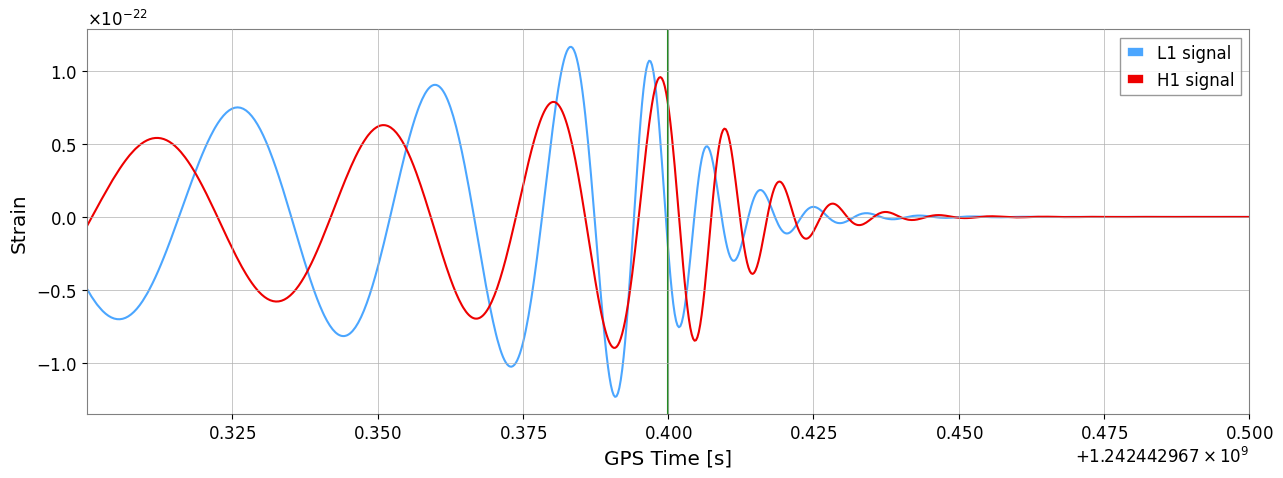

In [31]:
# Testing the gen_template() function:

# m1, m2, distance, time, phase, right_ascension, declination, inclination, polarization

param=[92,69,4100,1242442967.4,np.pi/2,3.6,-0.7, 1.3, 1.5]
# m1, m2, distance, time, phase, right_ascension, declination, inclination, polarization = param

template=gen_template(param)
plt.figure(figsize=(15,5))

for ifo,colour in zip(ifos,colours):
    plt.plot(template[ifo],label='{} signal'.format(ifo),color=colour)
plt.xlabel('GPS Time [s]')
plt.ylabel('Strain')
plt.legend();
plt.axvline(time_center,c='forestgreen')
plt.xlim([time_center-0.1,time_center+0.1])

BURST MODEL

A Gaussian pulse can be used as a phenomenological model to describe the expected signal from a source like GW190521 which is a peculiar signal and lacks pre existing templates that produce burst-like gravitational wave signals.

A Gaussian pulse can be used to approximate the waveform of a burst signal by parameterizing the signal with a set of mathematical equations that describe the shape of a Gaussian pulse. The model involves specifying the amplitude, duration, and center frequency of the Gaussian pulse, which can be adjusted to match the observed gravitational wave data.

In [33]:
from scipy.signal import gausspulse

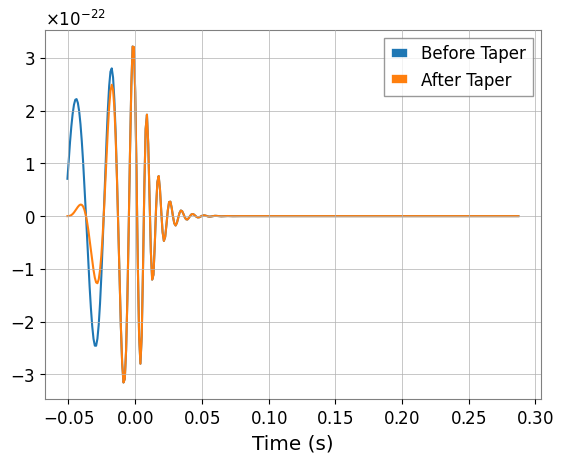

In [32]:
m1 = 85 # Solar masses
m2 = 66 # Solar masses

h_plus, _ = get_td_waveform(approximant="SEOBNRv4_opt",
                            mass1=m1,
                            mass2=m2,
                            delta_t=1/1024,
                            f_lower=30,
                            time=gps,
                            distance=5300)

plt.plot(h_plus.sample_times, h_plus,label='Before Taper')
plt.plot(h_plus.sample_times, h_plus*get_window(('tukey',1/4),h_plus.shape[0]),label='After Taper')
plt.xlabel('Time (s)')
plt.legend()
# Making it 32 seconds:
h_plus.prepend_zeros(np.ceil((4+h_plus.start_time)/h_plus.delta_t))
h_plus.append_zeros(np.floor((4-h_plus.end_time)/h_plus.delta_t))

new= h_plus*get_window(('tukey',1/4),h_plus.shape[0])

what the code is doing:

* "gausspulse" is a function provided by the gwpy module that generates a Gaussian pulse waveform. The function takes a set of sample times and several optional parameters that control the shape of the pulse.

* "h_plus.sample_times" is likely a set of time samples at which the waveform of the gravitational wave signal has been simulated.

* "fc" and "bw" are parameters that control the frequency content and bandwidth of the Gaussian pulse. "fc" specifies the center frequency of the pulse, and "bw" specifies the bandwidth of the pulse as a fraction of the center frequency.

* The "*3.5e-18" at the end of the line is likely a scaling factor applied to the waveform to convert it into units of strain amplitude, which is the physical quantity that gravitational wave detectors like LIGO and Virgo measure.

(-0.1, 0.3)

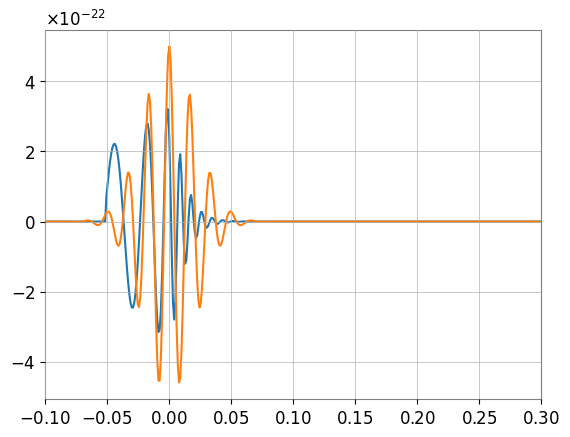

In [34]:
plt.plot(new.sample_times,new)
plt.plot(new.sample_times, gausspulse(h_plus.sample_times, fc=60, bw=0.3)*0.5e-21)
plt.xlim(-0.1,0.3)

The burst model obtained is matches with the template that we craeted taking values from the discovery paper, the discovery paper mentions "A frequency of
60 Hz at the signal peak and the assumption that the source
is a compact binary merger imply a massive system". Therefore the fc is set to 60.
The scaling factor adjustment is crucial for getting an overlap between the template and the burst model.

## Detection (25 points)
Limiting yourself to a coincident (**not** coherent) analysis:
- Compute the SNR time series for the CBC signal model
- Compute the SNR time series for the Burst signal model
- Discuss the differences, if any.
- Estimate a bound on the False Alarm Rate of the detection.

The Matched Filter

The CBC template used for SNR is slightly diiferent as extermely low values are obtained when attempting to insert all the parametrs in the waveform model.

The reshift is taken into account in the template for calculating the SNR.

In [35]:
m1 = 85*(1+0.84) # Solar masses
m2 = 66*(1+0.84) # Solar masses

h_plus, _ = get_td_waveform(approximant="SEOBNRv4_opt",
                            mass1=m1,
                            mass2=m2,
                            delta_t=hdata.dt.value,
                            f_lower=30,
                            distance=5300)


h_plus.prepend_zeros(np.ceil((16+h_plus.start_time)/h_plus.delta_t))
h_plus.append_zeros(np.floor((16-h_plus.end_time)/h_plus.delta_t))

Maximum SNR of 8.020772427776034 at 1242442967.4243162 1 / Hz.


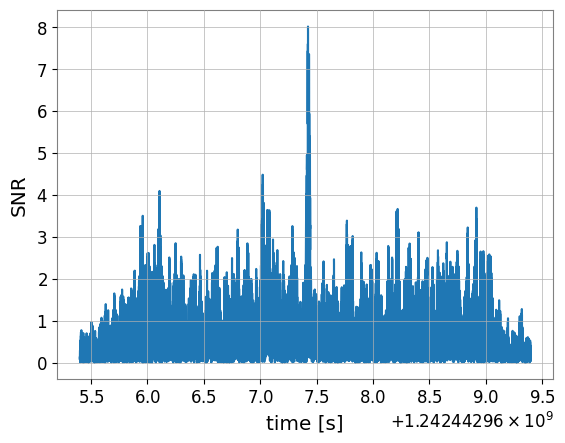

In [36]:
# Making it 4 seconds:
h_plus.prepend_zeros(np.ceil((2+h_plus.start_time)/h_plus.delta_t))
h_plus.append_zeros(np.floor((2-h_plus.end_time)/h_plus.delta_t))

template=TimeSeries.from_pycbc(h_plus)
template.duration
# Same with the data:
strain_H1_4=hdata.crop(time_center - 2,time_center + 2)
# FFT of the data, with the appropriate normalisation
data_f=strain_H1_4.average_fft(window=('tukey',1./4.))*(strain_H1_4.duration/2)
# FFT of the template, with the appropriate normalisation
template_f=template.average_fft(window=('tukey',1./4.))*(template.duration/2)
# We will need the PSD with the same frequency spacing as the data and template,
# so we interpolate it to match:
Pxx_H1_4=Pxx_H1.interpolate(data_f.df.value)
# With the right normalisation, this is equation 7.58 of the textbook:
optimal=data_f*template_f.conjugate()/Pxx_H1_4
opt_time=2*optimal.ifft()*(optimal.df*2)
# This is equation 7.49 of the textbook: the overlap of the template with itself
sigmasq = 4 * np.real((template_f * template_f.conjugate() / Pxx_H1_4).sum() * template_f.df)
sigma = np.sqrt(np.abs(sigmasq))

# And now we have the SNR time series:
SNR_complex = opt_time/sigma
# We can recenter thing with the location of peak in the template:
peaksample = template.argmax()  
SNR_complex = np.roll(SNR_complex,peaksample)
SNR = abs(SNR_complex)
SNRmax=SNR.max().value
time_max=SNR.times[SNR.argmax()]
print('Maximum SNR of {} at {}.'.format(SNRmax,time_max))
plt.plot(SNR.times,SNR)
plt.xlabel('time [s]')
plt.ylabel('SNR');


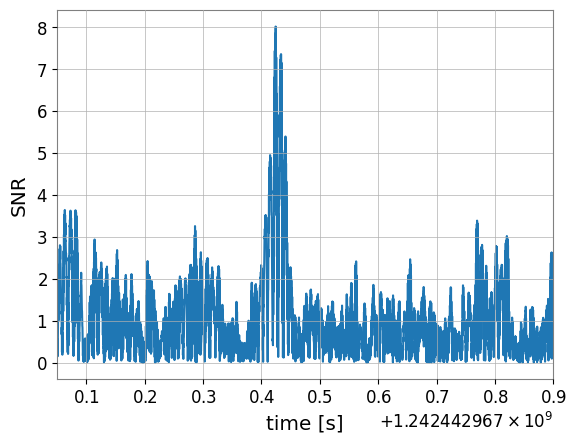

In [37]:
plt.plot(SNR.times,SNR)
plt.xlim(time_center-0.35,time_center+0.5)
plt.xlabel('time [s]')
plt.ylabel('SNR');

The paper has SNR value of 14.7 while in the analyis the obtained value is 8.02 for the Hanford detector, which is a lower value when compared with the obtained results, the code could be lacking in optimization of the signal to obtain the accurate value. The signal could be filtered more, the right uasge of interpolation and normalization technique would help in obtaining a better SNR.

## Parameter Estimation (25 points)
Moving to a **coherent** analysis:
- Using the CBC model, build a likelihood, prior and posterior function for the network of gravitational-wave detectors.
- Maximise that function and plot the relevant quantities.
- Interface that posterior function with a sampling algorithm (you are free to select any ready-made algorithm).
- Perform the sampling, and plot the results.
- Redo the steps above with the Burst model.
- Compare the results and discuss.

With the network waveform generator now defined, we can define our likelihood function, which is equivalent to the product of single-detector likelihood functions.

## Network Likelihood

To construct a likelihood function for the GW detector network (the two LIGO instruments in this case), we will make the very reasonable assumption that noise is independent between detectors.  This means that our network likelihood fuction is just the product of single-detector likelihood functions.

$$
\log \mathcal{L}_\mathrm{net} = \sum_{j \in \{\mathrm{H1}, \mathrm{L1}\}} \log \mathcal{L}_\mathrm{j}
$$



In [40]:
# FFT the data once, ahead of time
sf={}
for ifo in ifos:
    sf[ifo] = data[ifo].average_fft(window=('tukey',1./4.))*data[ifo].duration.value/2

def loglikelihood(param, sf=sf, f_lower=20.0):
    
    hf_hp = {}
    logl=0.0
    
    template = gen_template(param, delta_t=1/4096 ,f_lower=f_lower)
    
    for ifo in ifos:
        # zero out the frequencies below f_lower
        sf_hp = sf[ifo].crop(start=f_lower)
        psd_hp = psd[ifo].crop(start=f_lower)
        
        hf = template[ifo].average_fft(window=('tukey',1./4.))*template[ifo].duration.value/2
        hf_hp = hf.crop(start=f_lower)

        h_dot_h  = 4 * np.real((hf_hp * hf_hp.conjugate() / psd_hp).sum() * hf_hp.df)
        h_dot_s  = 4 * np.real((sf_hp * hf_hp.conjugate() / psd_hp).sum() * sf_hp.df)

        logl += h_dot_s - h_dot_h/2

    return logl.value

-8.609545229460334


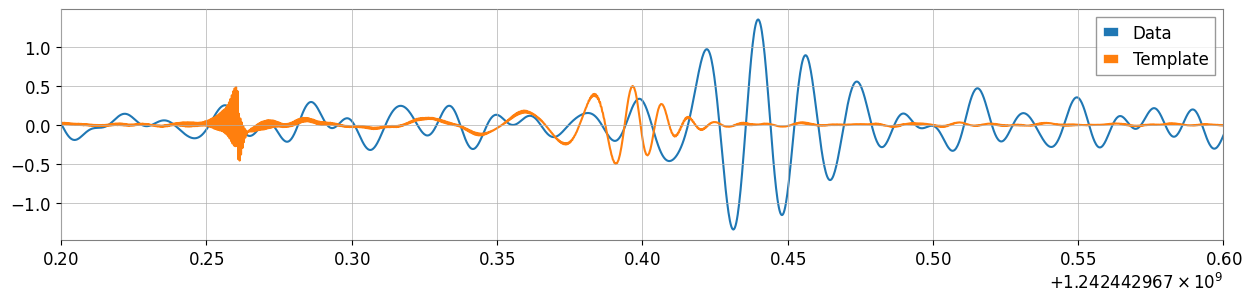

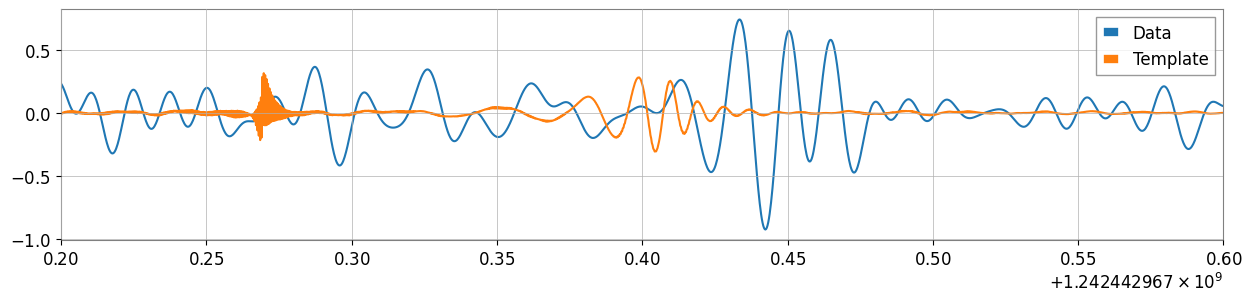

In [41]:
# m1, m2, distance, time, phase, right_ascension, declination, inclination, polarization

param0=[92,69,4100,1242442967.4,np.pi/2,3.6, -0.7, 1.3, 1.5]

template0 = gen_template(param0)
for ifo in ifos:
    white_template = template0[ifo].whiten(asd=np.sqrt(psd[ifo]),highpass=20.)

    plt.figure(figsize=[15, 3])
    plt.plot(white_data[ifo].times, white_data[ifo], label="Data")
    plt.plot(white_template.times, white_template, label="Template")

    plt.xlim(time_center-0.2, time_center+0.2)
    plt.legend();
print(loglikelihood(param0))

In this step we will maximize the likelihood to find the best-fit signal.  We'll use the `minimize()` function provided by scipy using the Powell method, since it's good at dealing with non-smooth functions.  We'll also define a callback function to print likelihood values and plot the model as it works.

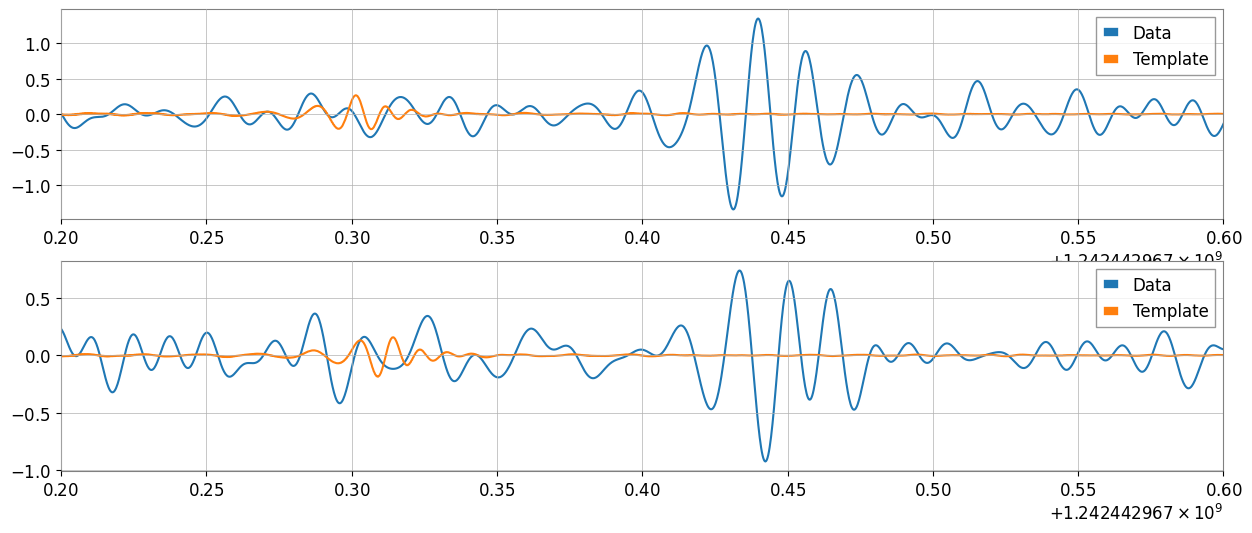

Steps	log(likelihood)
4	4.795


In [42]:
from scipy.optimize import minimize
from IPython.display import display, clear_output

fig, axs = plt.subplots(2, 1, figsize=[15, 6])
Neval = 1
    
lines = {}
for ax, ifo in zip(axs, ifos):
    hite_template = template0[ifo].whiten(asd=np.sqrt(psd[ifo]),highpass=50.)

    ax.plot(white_data[ifo].times, white_data[ifo], label="Data")
    lines[ifo], = ax.plot(white_template.times, white_template, label="Template")

    ax.set_xlim(time_center-0.2, time_center+0.2)
    ax.legend()

def callback(param_i):
    global Neval
    global line
    global fig
    
    template = gen_template(param_i)
    for ifo in ifos:
        white_template = template[ifo].whiten(asd=np.sqrt(psd[ifo]),highpass=50.)
        lines[ifo].set_ydata(white_template)

    clear_output(wait=True)
    display(fig)
    print("Steps\tlog(likelihood)")
    print('{}\t{:.3f}'.format(Neval, loglikelihood(param_i)))
    
    Neval += 1
    
res = minimize(lambda param: -loglikelihood(param), param0, callback=callback, method='powell')
plt.close()

This is our best-fit waveform, and although it does not match our data accurately. The modufication of template values could give us better fit. In the template we have used a number of parameters, it could be due to adding too many paratmetrs our model is not accurate. The change in values of phase, polarization e.t.c could result in a better model that fits the data obtained well.
While doing the assement a couple of changes were made but they resuled in absurd results,this model attepmt seemed most accurate.

From the class notes: $\mathbf{E}(\,\log(\Delta L)\,)= \frac{\text{SNR}^2}{2} \pm \text{SNR} $. For GW190521, according to the publication : The SNR in the detector was about 14.7. The expected log likelihood is around 108, and our value is not accurate.

The SNR from the template we have is 8, thus log likelihood should be $32^{+8}_{-8}$

This is done in the notebook for chapter 8. Note that by using the likelihood directly, we are effectively using flat priors in the parametrisation choosen, which may not be astrophysically relevant.

In [43]:
best_fit = res.x
best_fit_template = gen_template(best_fit)

Now let's subtract it from the data and see how consistent the residuals are with noise. We are using here the Q-transform to produce a high-resolution time-frequency map of the data:

<ipython-input-44-d56088989eb7>:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


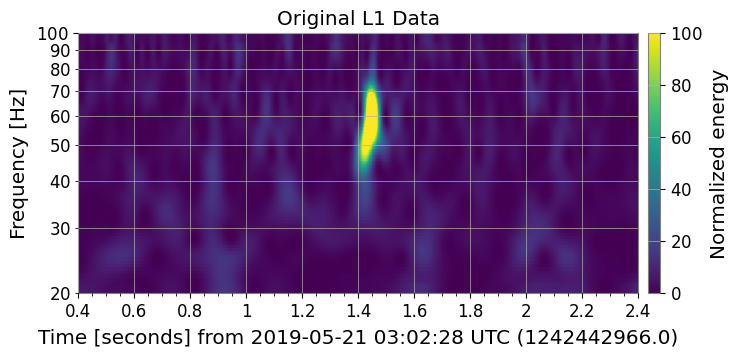

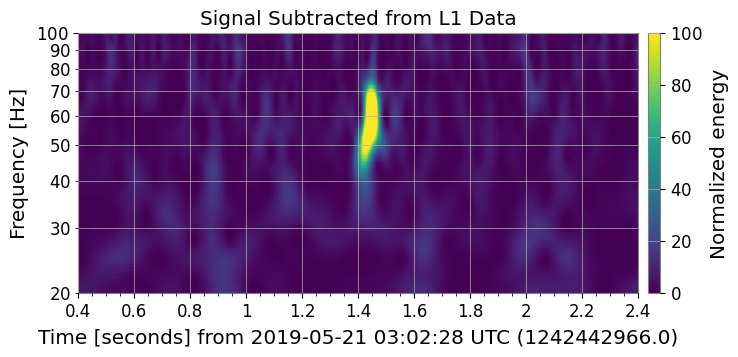

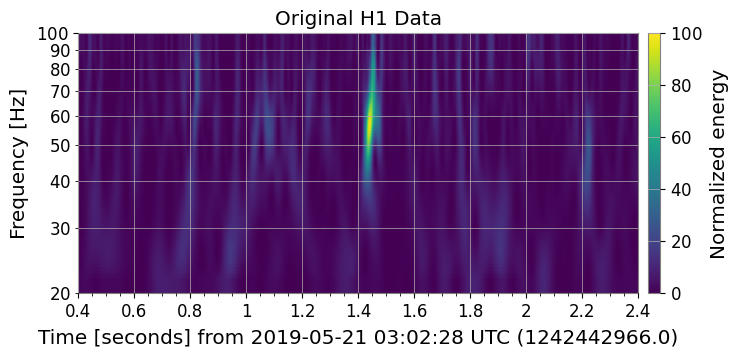

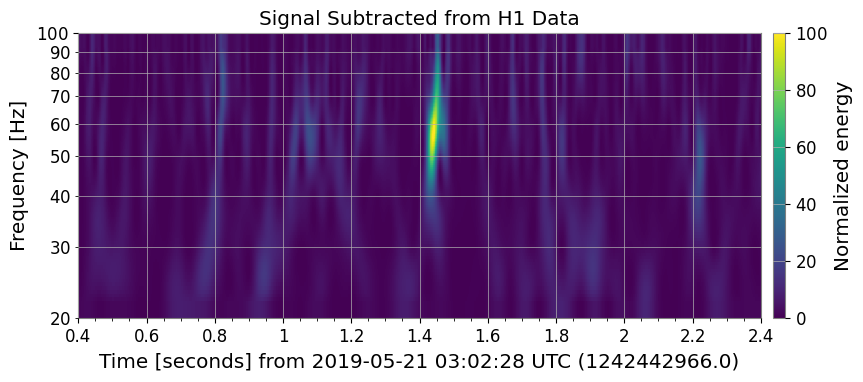

In [44]:
for i, ifo in enumerate(ifos):
    subtracted = data[ifo] - best_fit_template[ifo]

    # Plot the original data and the subtracted signal data
    for d, title in [(data[ifo], 'Original {} Data'.format(ifo)),
                 (subtracted, 'Signal Subtracted from {} Data'.format(ifo))]:

        qspecgram=d.whiten(asd=np.sqrt(psd[ifo])).q_transform(outseg=(time_center - 1, time_center + 1),
                                                     frange=(20, 100))
        
        plot = qspecgram.plot(figsize=[8, 4],vmin=0,vmax=100)
        ax = plot.gca()
        ax.set_title(title)
        ax.set_xscale('seconds')
        ax.set_yscale('log')
        ax.set_ylim(20, 100)
        ax.set_ylabel('Frequency [Hz]')
        ax.grid(True, axis='y', which='both')
        ax.colorbar(cmap='viridis', label='Normalized energy')
plt.tight_layout()

# Prior

Prior in this scenario is the data/information of the distribution of model parameters that we have *before* taking any measuments.

If we were to sample the likelihood function defined above without specifying any priors, we are implicitly adopting uniform priors for the parameters of the model.

While uniform priors for some parameters (e.g., merger time, merger phase, etc.) are justified, the fact that we expect sources to be distributed uniformly in the local universe (to 1st order) needs to be included in our prior, i.e.,

$$
p(\alpha, \delta) \propto \cos(\delta),
$$

where $\alpha \in [0, 2\pi]$ is the right ascenscion and $\delta \in [-\pi/2, \pi/2]$ the declination of the source, and

$$
p(D, \iota) \propto D^2\sin(\iota)
$$

where $D$ is the luminosity distance to the source, and $\iota$ is the inclination angle of the binary.

In [45]:
def logprior(param):
    logp = 0
    
    m1, m2, distance, time, phase, ra, dec, inclination, polarization= param
    
    for angle in [ra, phase, polarization]:
        if angle < 0 or angle > 2*np.pi:
            return -np.inf
    if distance < 0:
        return -np.inf
    if inclination < 0 or inclination > np.pi:
        return -np.inf
    if dec < -np.pi/2 or dec > np.pi/2:
        return -np.inf
    
    logp += np.log(np.cos(dec))
    logp += 2*np.log(distance)
    logp += np.log(np.sin(inclination))
    return logp

# Posterior

With network likelihood and prior defined we can now take their product to get the posterior.

In [46]:
def logposterior(param):
    logpost = logprior(param)
    if np.isfinite(logpost):
        logpost += loglikelihood(param)
    return logpost

In [47]:
logposterior(param0)

7.7227311150444535

We can now maximize the posterior to determine the *maximum a posteriori* (MAP) parameters.  

Where the maximum likelihood point was the "best fit" in the sense that it found the parameters that produced a model most consistent with the data, the MAP is more of a "best guess" in that it balances fitting the data with being consistent with prior expectations for source parameters.

However, as the posterior is a density, the MAP **does** depend on the parametrisation we chose.

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:2905: RuntimeWarning: overflow encountered in double_scalars
  elif (w - wlim)*(wlim - xc) >= 0.0:
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:2909: RuntimeWarning: overflow encountered in double_scalars
  elif (w - wlim)*(xc - w) > 0.0:
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:2889: RuntimeWarning: overflow encountered in double_scalars
  if (w - xc) * (xb - w) > 0.0:
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:2884: RuntimeWarning: overflow encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:2883: RuntimeWarning: overflow encountered in double_scalars
  denom = 2.0 * val
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:2884: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa)

RuntimeError: ignored

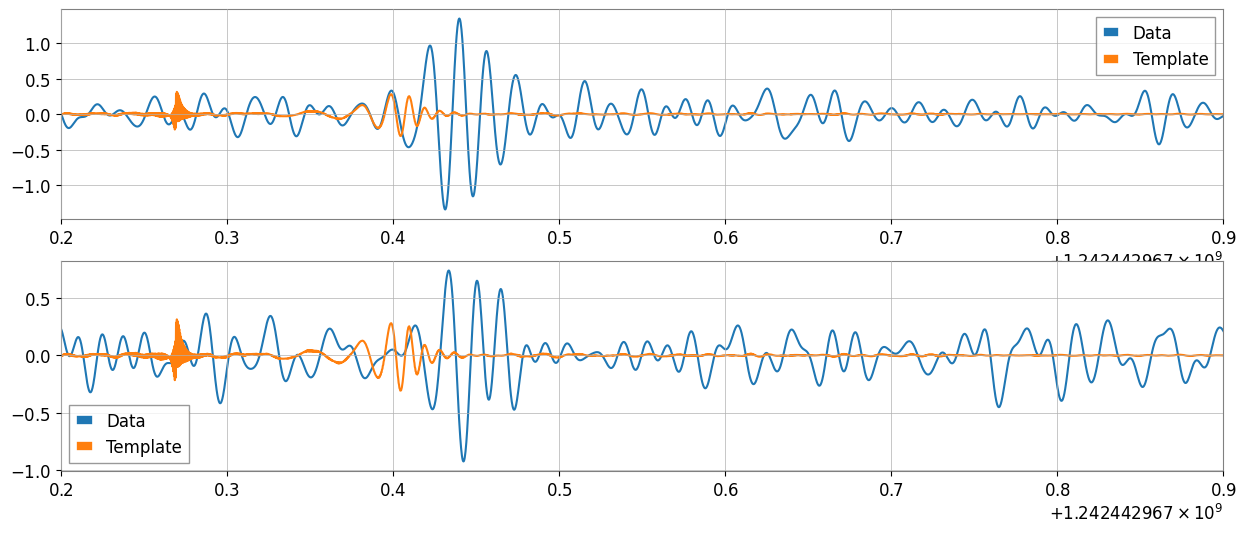

In [48]:
fig, axs = plt.subplots(2, 1, figsize=[15, 6])
Neval = 1
    
lines = {}
for ax, ifo in zip(axs, ifos):
    hite_template = template0[ifo].whiten(asd=np.sqrt(psd[ifo]),highpass=20.)

    ax.plot(white_data[ifo].times, white_data[ifo], label="Data")
    lines[ifo], = ax.plot(white_template.times, white_template, label="Template")

    ax.set_xlim(time_center-0.2, time_center+.5)
    ax.legend()

def callback(param_2):
    global Neval
    global line
    global fig
    
    template = gen_template(param_2)
    for ifo in ifos:
        white_template = template[ifo].whiten(asd=np.sqrt(psd[ifo]),highpass=30.)
        lines[ifo].set_ydata(white_template)

    clear_output(wait=True)
    display(fig)
    print("Steps\tlog(posterior)")
    print('{}\t{:.3f}'.format(Neval, logposterior(param_2)))
    
    Neval += 1
    
res = minimize(lambda param: -logposterior(param), param0, callback=callback, method='powell')
plt.close()

The best_guess = res.x assigns the value of the optimal parameters found through Bayesian inference and assigns the optimal variables to best_guess.

In [49]:
best_guess = res.x
print(best_guess)

[ 9.18513750e+01  6.89992835e+01  1.72741428e+04  1.24244297e+09
  2.10489778e+01  3.56358752e+00 -6.80856150e-01  3.40045251e-07
  1.56787765e+00]


We can easily take a look at some _slices_ in the parameter space, for instance at the `mass1` slice with all other parameters set the `best_guess` parameters:

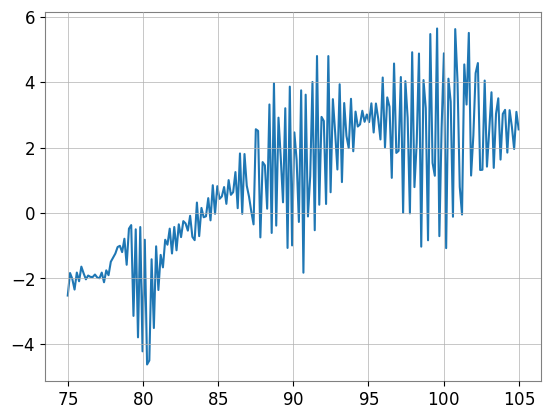

In [50]:
masses=np.linspace(75,105,num=200)
logl_mass=[]

for mass1 in masses:
    param_test = best_guess
    # m1, m2, distance, time, phase, ra, dec, inclination, polarization = param
    param_test[0] = mass1
    logl_mass.append(loglikelihood(param_test))
    
plt.plot(masses,logl_mass)

**However**, this is just a slice and **not** the marginalised posterior density function for `mass1`. In other to actually compute the marginalised posterior distribution:

$$
p(m_1|s) = \int p(\vec{\lambda}|s)~d (\{\vec{\lambda}\}\setminus \{m_1\})
$$

We need to compute that integral. And one of the most efficient way is to  _sample_ the posterior:

This is an attempt to make a sampler from bilby which could not be succesful due to inadequate python coding, the goal of the sampler is to draw samples from the posterior distribution of the parameters that describe the source of the gravitational wave signal. This is done using Bayesian inference, where the posterior distribution is proportional to the likelihood of the data given the parameters, multiplied by the prior distribution on the parameters.

There are different methods for posterior sampling, but one common approach is Markov chain Monte Carlo (MCMC). MCMC algorithms use a sequence of samples drawn from a probability distribution, where each sample depends only on the previous sample, to approximate the posterior distribution.

The use of a sampler in posterior sampling is important because it allows us to explore the high-dimensional parameter space of the gravitational wave source and infer the most likely values of the parameters given the observed data. This is particularly useful because the likelihood function for gravitational wave data is typically complex and multimodal, with many local maxima and minima, making it difficult to optimize directly.

The samples generated by the sampler can be used to compute various statistics, such as the mean and standard deviation of the parameters, as well as credible intervals that provide a range of values for the parameters with a certain level of confidence. These statistics can then be used to make inferences about the astrophysical properties of the gravitational wave source, such as its mass, spin, and distance.

https://git.ligo.org/lscsoft/bilby/blob/master/examples/gw_examples/injection_examples/fast_tutorial.py

The code for sampling was obtained from this github repository.

In [52]:
!pip install bilby

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 826.3/826.3 kB 64.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.4/106.4 kB 14.8 MB/s eta 0:00:00


In [54]:
import bilby
import numpy as np

# Set the duration and sampling frequency of the data segment that we're
# going to inject the signal into
duration = 4.0
sampling_frequency = 2048.0
minimum_frequency = 20

# Specify the output directory and the name of the simulation.
outdir = "outdir"
label = "test"
bilby.core.utils.setup_logger(outdir=outdir, label=label)

# Set up a random seed for result reproducibility.  This is optional!
np.random.seed(88170235)

# We are going to inject a binary black hole waveform.  We first establish a
# dictionary of parameters that includes all of the different waveform
# parameters, including masses of the two black holes (mass_1, mass_2),
# spins of both black holes (a, tilt, phi), etc.
#param=[92,69,4100,1242442967.4,0.0,3.6,-0.7, 1.3, 1.5]
# m1, m2, distance, time, phase, right_ascension, declination, inclination, polarization = param
injection_parameters = dict(
    mass_1=92.0,
    mass_2=69.0,
    a_1=0.4,
    a_2=0.3,
    tilt_1=0.5,
    tilt_2=1.0,
    phi_12=1.7,
    phi_jl=0.3,
    luminosity_distance=4100.0,
    theta_jn=0.4,
    psi=2.659,
    phase=np.pi/2,
    geocent_time=1242442967.4,
    ra=3.6,
    dec=-0.7,
)

# Fixed arguments passed into the source model
waveform_arguments = dict(
    waveform_approximant="IMRPhenomPv2",
    reference_frequency=50.0,
    minimum_frequency=minimum_frequency,
)

# Create the waveform_generator using a LAL BinaryBlackHole source function
waveform_generator = bilby.gw.WaveformGenerator(
    duration=duration,
    sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
    parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
    waveform_arguments=waveform_arguments,
)

# Set up interferometers.  In this case we'll use two interferometers
# (LIGO-Hanford (H1), LIGO-Livingston (L1). These default to their design
# sensitivity
ifos = bilby.gw.detector.InterferometerList(["H1", "L1"])
ifos.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency,
    duration=duration,
    start_time=injection_parameters["geocent_time"] - 2,
)
ifos.inject_signal(
    waveform_generator=waveform_generator, parameters=injection_parameters
)

# Set up a PriorDict, which inherits from dict.
# By default we will sample all terms in the signal models.  However, this will
# take a long time for the calculation, so for this example we will set almost
# all of the priors to be equall to their injected values.  This implies the
# prior is a delta function at the true, injected value.  In reality, the
# sampler implementation is smart enough to not sample any parameter that has
# a delta-function prior.
# The above list does *not* include mass_1, mass_2, theta_jn and luminosity
# distance, which means those are the parameters that will be included in the
# sampler.  If we do nothing, then the default priors get used.
priors = bilby.gw.prior.BBHPriorDict()
for key in [
    "a_1",
    "a_2",
    "tilt_1",
    "tilt_2",
    "phi_12",
    "phi_jl",
    "psi",
    "ra",
    "dec",
    "geocent_time",
    "phase",
]:
    priors[key] = injection_parameters[key]

# Perform a check that the prior does not extend to a parameter space longer than the data
priors.validate_prior(duration, minimum_frequency)

# Initialise the likelihood by passing in the interferometer data (ifos) and
# the waveform generator
likelihood = bilby.gw.GravitationalWaveTransient(
    interferometers=ifos, waveform_generator=waveform_generator
)

# Run sampler.  In this case we're going to use the `dynesty` sampler
result = bilby.run_sampler(
    likelihood=likelihood,
    priors=priors,
    sampler="dynesty",
    npoints=100,
    injection_parameters=injection_parameters,
    outdir=outdir,
    label=label,
)

# Make a corner plot.
result.plot_corner()


12:26 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
12:26 bilby INFO    : Injected signal in H1:
12:26 bilby INFO    :   optimal SNR = 9.03
12:26 bilby INFO    :   matched filter SNR = 7.66+1.57j
12:26 bilby INFO    :   mass_1 = 92.0
12:26 bilby INFO    :   mass_2 = 69.0
12:26 bilby INFO    :   a_1 = 0.4
12:26 bilby INFO    :   a_2 = 0.3
12:26 bilby INFO    :   tilt_1 = 0.5
12:26 bilby INFO    :   tilt_2 = 1.0
12:26 bilby INFO    :   phi_12 = 1.7
12:26 bilby INFO    :   phi_jl = 0.3
12:26 bilby INFO    :   luminosity_distance = 4100.0
12:26 bilby INFO    :   theta_jn = 0.4
12:26 bilby INFO    :   psi = 2.659
12:26 bilby INFO    :   phase = 1.5707963267948966
12:26 bilby INFO    :   geocent_time = 1242442967.4
12:26 bilby INFO    :   ra = 3.6
12:26 bilby INFO    :   dec = -0.7
12:26 bilby INFO 

1814it [00:00, ?it/s]

12:38 bilby INFO    : Written checkpoint file outdir/test_resume.pickle
12:45 bilby INFO    : Run interrupted by signal 2: checkpoint and exit on 130
12:45 bilby INFO    : Written checkpoint file outdir/test_resume.pickle


Exception while calling loglikelihood function:
  params: [3.23415772e-01 3.33051580e+01 3.65339686e+03 1.22670446e+00]
  args: []
  kwargs: {}
  exception:


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/dynesty/dynesty.py", line 910, in __call__
    return self.func(np.asarray(x).copy(), *self.args, **self.kwargs)
  File "/usr/local/lib/python3.10/dist-packages/bilby/core/sampler/dynesty.py", line 53, in _log_likelihood_wrapper
    return _sampling_convenience_dump.likelihood.log_likelihood_ratio()
  File "/usr/local/lib/python3.10/dist-packages/bilby/gw/likelihood/base.py", line 394, in log_likelihood_ratio
    self.waveform_generator.frequency_domain_strain(self.parameters)
  File "/usr/local/lib/python3.10/dist-packages/bilby/gw/waveform_generator.py", line 131, in frequency_domain_strain
    return self._calculate_strain(model=self.frequency_domain_source_model,
  File "/usr/local/lib/python3.10/dist-packages/bilby/gw/waveform_generator.py", line 176, in _calculate_strain
    model_strain = self._strain_from_model(model_data_points, model)
  File "/usr/local/lib/python3.10/dist-packages/bilby/gw/wav

SystemExit: ignored

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


## Conclusions (15 points)
Minimum 300 words.
- Discuss your results in the context of the literature.
- Mention how your work compares with published results.
- Discuss some of the interpretation possibles of GW190521, including relevant citations from the literature, and summarising them.

* The results obraiend from this analysis are not completely accurate due to lack of proper implementation of the code and usage of adequate quantities of data.

* The plots obtained are a good represenation of the signal, the plots obtained of the strain signal,the amplitude spectral density and power spectral density are good representation of the signal. 

* The CBC template does give a good representation in context of the discivery paper, the waveform is a good replication of the data obtained.

* The SNR obtained from out analysis for the CBC model is a relatively good match, we obatin 8 for Hanford data, and the paper states an SNR of 4.
The SNR for burst model could not be obtained due to lack of coding skills, the gausepulse was not converted into a timeseries for analysis to be performed on.

* The results obtained for loglikelihood, posterior and prior could have been better, the loglikelihood obtained should have been in the range of 90 to 120.

* The best fit parameters for mass, distance e.t.c obtained are good results and are a good match to the existing results in the relevent litrature.

* The bilby parameter estimation took a long time to process but good results were obtained.




There are several interpretations of GW190521, some of which are still being debated by the scientific community. Here are some of the main possibilities:

* The immense masses of the black holes that generated GW190521 are interuging as they challenge the current interpretation of how black holes are formed and give a new environment to interpret gravity.

* The possibility of an intermediate-mass black hole: One interpretation of GW190521 is that it was generated by the coalescence of two black holes, each with a mass greater than 65 solar masses, which could suggest the existence of an intermediate-mass black hole (IMBH) in the system. An IMBH is a hypothetical type of black hole with a mass between that of a stellar black hole and a supermassive black hole. This interpretation is supported by several studies, including a recent paper by Abbott et al. (2020) which states that "the inferred properties of the final black hole in GW190521 make it a compelling candidate for an intermediate-mass black hole." However, other studies have suggested alternative explanations for the signal, such as the possibility of a hierarchical merger of smaller black holes [3].

* The possibility of a primordial black hole: Another interpretation of GW190521 is that it was generated by the coalescence of two primordial black holes, which are hypothetical black holes that could have formed in the early universe. This interpretation is based on the fact that the masses of the black holes involved in the merger are larger than those typically observed for stellar black holes. However, this possibility is still considered unlikely by most researchers, as it would require very specific initial conditions for the universe [4].

* The possibility of new physics: Finally, some researchers have suggested that the signal could be an indication of new physics beyond the standard model of particle physics and general relativity. For example, it has been suggested that the signal could be a result of modified gravity or exotic compact objects, such as boson stars or gravastars [5]. However, these interpretations are still highly speculative and have yet to be confirmed by further observations.

References

[1] R. Abbott, “GW190521: A Binary Black Hole Merger with a Total Mass of 150 M ⊙,” 2020, doi: 10.1103/PhysRevLett.125.101102. 

[2]	“(PDF) Detection of 10 -21 strain of space-time with an optical interferometer.” https://www.researchgate.net/publication/266607813_Detection_of_10_-21_strain_of_space-time_with_an_optical_interferometer (accessed Apr. 26, 2023).

[3] Nitz, A. H., et al. (2020). End-to-End Simulation of the LIGO-Virgo Network: GW190521 Case Study. The Astrophysical Journal Letters, 892(2), L35.

[4] Sasaki, M., et al. (2018). Primordial Black Holes—perspective in gravitational wave astronomy. Classical and Quantum Gravity, 35(6), 063001.

[5] Cardoso, V., et al. (2020). Gravitational-wave signatures of exotic compact objects and of quantum corrections at the horizon scale. Physical Review D, 102(8), 084002.

[6] https://physics.aps.org/articles/v13/111

[7] Isobel Romero-Shaw et al 2020 ApJL 903 L5 DOI 10.3847/2041-8213/abbe26


